In [717]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import random
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
import pprint

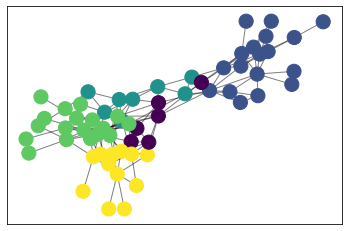

In [718]:
G=nx.Graph()
# gr=pd.read_csv('karate.csv')
gr=pd.read_csv('dolphin.csv')
#gr=pd.read_csv('football.csv')
edge=[(gr['Source'][i],gr['Destination'][i]) for i in range(0,len(gr['Source']))]
G.add_edges_from(edge)
node=max([max(x[0],x[1]) for x in edge])
# compute the best partition
# partition contains color of each node
partition = community_louvain.best_partition(G)

# visualization of clusters
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=200,cmap=cmap, node_color=list(partition.values()),)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [719]:
# Generating gateEdges
# gateEdges contains edges--> [(a,b),(b,c)]
gateEdges=[]
for x in edge:
    if(partition[x[0]]!=partition[x[1]]):
        gateEdges.append(x)

# Generating gate nodes 
gateNodesDict={}

for tup in gateEdges:
    gateNodesDict[tup[0]]=1
    gateNodesDict[tup[1]]=1

gateNodesList=list(gateNodesDict.keys())

print("Gateway graph nodes:",gateNodesList)
for x in gateNodesList:
    for y in gateNodesList:
        if(x==y or ((x,y) in gateEdges) or ((y,x) in gateEdges)):
            continue
        else:
            if(partition[x]==partition[y]):
                if((x,y) in edge or (y,x) in edge):
                    gateEdges.append((x,y))
gatewayGraph=nx.Graph()
gatewayGraph.add_edges_from(gateEdges)

Gateway graph nodes: [14, 0, 3, 15, 19, 1, 20, 8, 18, 24, 27, 7, 28, 29, 10, 30, 33, 21, 36, 23, 37, 40, 43, 44, 2, 45, 47, 50, 42, 51, 52, 54, 57, 39, 59, 61]


In [720]:
# Gate graph
# This is the gate way graph
# gate
tot_g=[]
tot_graphs=[]
for i in range(0,500):
    g = G
    gatew = gatewayGraph
    attr = {(u, v): {"weight": round(random.uniform(0,1),2)} for (u, v) in G.edges()}
    nx.set_edge_attributes(g, attr)
    tot_g.append(g.subgraph(gatew))
    tot_graphs.append(g)

# for k in range(0,500):
#     print(len(tot_g[k]))
#     tot_g[k].add_nodes_from(gateNodesList)
#     print(len(tot_g[k]))
#     for i in range(0,len(gateEdges)):
#         tot_g[k].add_edge(gateEdges[i][0],gateEdges[i][1],weight=round(random.uniform(0,1),2))
#     break

In [721]:
#BCS Score
def BCS(gg,nodes,nodeList):
    BCS_={}
    for node in nodeList:
        BCS_[node]=0
    for i in gg:
        x=(nx.betweenness_centrality(i,weight='weight'))
        for j in x:
            BCS_[j]+=(1/500)*x[j]
    return BCS_
BCS_value=BCS(tot_g,len(gateNodesList),gateNodesList)
BCS_value=(sorted(BCS_value.items(), key=lambda x: x[1],reverse=True))
print(BCS_value)

[(15, 0.2773109243697496), (40, 0.2319327731092446), (20, 0.15798319327731122), (8, 0.15756302521008356), (36, 0.1512605042016807), (45, 0.1478991596638665), (37, 0.14453781512605016), (0, 0.1277310924369742), (50, 0.1243697478991588), (14, 0.12268907563025293), (28, 0.11890756302521086), (29, 0.08907563025210134), (1, 0.07226890756302508), (30, 0.06890756302520983), (61, 0.0642857142857145), (7, 0.05210084033613418), (19, 0.04705882352941154), (42, 0.04705882352941154), (59, 0.04705882352941154), (2, 0.0462184873949583), (21, 0.04159663865546223), (47, 0.040756302521007995), (39, 0.040336134453781224), (18, 0.03151260504201704), (54, 0.0302521008403359), (33, 0.020168067226890612), (51, 0.01512605042016795), (44, 0.01218487394957975), (10, 0.010084033613445306), (57, 0.008403361344537806), (3, 0.0), (24, 0.0), (27, 0.0), (23, 0.0), (43, 0.0), (52, 0.0)]


In [722]:
# Model selection - diffusion time
model = ep.SIModel(G)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.03)
cfg.add_model_parameter("fraction_infected", 1/max([max(x[0],x[1]) for x in edge]))
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

#Mapping diffusion_time_to_each_node
time_of_diffusion={}
for i in range(1,node+1):
    time_of_diffusion[i]=-1
for i in iterations:
    for j in i['status']:
        if(i['status'][j]==1):
            time_of_diffusion[j]=i['iteration']

100%|██████████| 200/200 [00:00<00:00, 2777.93it/s]


In [723]:
print(time_of_diffusion)

{1: 21, 2: 32, 3: 23, 4: 27, 5: 29, 6: 43, 7: 35, 8: 14, 9: 30, 10: 24, 11: 72, 12: 62, 13: 38, 14: 12, 15: 35, 16: 17, 17: 40, 18: 28, 19: 51, 20: 2, 21: 35, 22: 50, 23: 34, 24: 22, 25: 43, 26: 28, 27: 46, 28: 11, 29: 41, 30: 21, 31: 87, 32: 60, 33: 19, 34: 14, 35: 88, 36: 0, 37: 8, 38: 9, 39: 29, 40: 35, 41: 44, 42: 23, 43: 31, 44: 22, 45: 14, 46: 54, 47: 5, 48: 34, 49: 45, 50: 18, 51: 21, 52: 18, 53: 53, 54: 22, 55: 61, 56: 59, 57: 26, 58: 12, 59: 51, 60: 64, 61: 36, 0: 39}


In [724]:
sensor_nodes=[BCS_value[i][0] for i in range(0,3)]
print(sensor_nodes)
print(gateNodesList)
print(len(gateEdges))

[15, 40, 20]
[14, 0, 3, 15, 19, 1, 20, 8, 18, 24, 27, 7, 28, 29, 10, 30, 33, 21, 36, 23, 37, 40, 43, 44, 2, 45, 47, 50, 42, 51, 52, 54, 57, 39, 59, 61]
96


In [725]:
delta_t=[]
min_v=min([time_of_diffusion[i] for i in sensor_nodes])
min_n=-1
for i in sensor_nodes:
    if(time_of_diffusion[i]==min_v):
        min_n=i
        break
delta_t=[abs(time_of_diffusion[i]-min_v) for i in sensor_nodes if(i!=min_n)]
print(delta_t)

[33, 33]


In [726]:
timeOfDiffusions=[]
for i in tot_g:
    print(len(i.edges()))
    # Model selection - diffusion time
    model = ep.SIModel(i)

    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.03)
    cfg.add_model_parameter("fraction_infected", 1/max([max(x[0],x[1]) for x in edge]))
    model.set_initial_status(cfg)

    # Simulation execution
    iterations = model.iteration_bunch(200)

    #Mapping diffusion_time_to_each_node
    time_of_diffusion={}
    for i in range(1,node+1):
        time_of_diffusion[i]=-1
    for i in iterations:
        for j in i['status']:
            if(i['status'][j]==1):
                time_of_diffusion[j]=i['iteration']
    timeOfDiffusions.append(len(time_of_diffusion))

  0%|          | 0/200 [00:00<?, ?it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1169.71it/s]

96



100%|██████████| 200/200 [00:00<00:00, 1212.17it/s]

96


 44%|████▍     | 89/200 [00:00<00:00, 881.25it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 56%|█████▌    | 111/200 [00:00<00:00, 1099.15it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1204.86it/s]

96
96



 64%|██████▍   | 128/200 [00:00<00:00, 1279.88it/s]

96


 46%|████▋     | 93/200 [00:00<00:00, 929.84it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1162.88it/s]


96
96

 52%|█████▏    | 103/200 [00:00<00:00, 1019.91it/s]


96


100%|██████████| 200/200 [00:00<00:00, 1183.43it/s]


96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 63%|██████▎   | 126/200 [00:00<00:00, 1247.76it/s]

96


 36%|███▌      | 71/200 [00:00<00:00, 703.03it/s]

96


 62%|██████▏   | 123/200 [00:00<00:00, 1229.88it/s]

96
96


 67%|██████▋   | 134/200 [00:00<00:00, 1339.98it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1176.61it/s]

96
96



  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 60%|██████    | 120/200 [00:00<00:00, 1188.15it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1183.52it/s]


96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 68%|██████▊   | 137/200 [00:00<00:00, 1369.73it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1142.88it/s]

96
96



  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1169.42it/s]

96



 66%|██████▋   | 133/200 [00:00<00:00, 1316.93it/s]

96
96


 60%|██████    | 120/200 [00:00<00:00, 1188.18it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 40%|████      | 81/200 [00:00<00:00, 802.04it/s]

96


 50%|█████     | 101/200 [00:00<00:00, 1000.08it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 987.18it/s]

96


 47%|████▋     | 94/200 [00:00<00:00, 921.65it/s]

96


 38%|███▊      | 76/200 [00:00<00:00, 752.54it/s]

96


 87%|████████▋ | 174/200 [00:00<00:00, 824.35it/s]

96


 36%|███▌      | 72/200 [00:00<00:00, 712.85it/s]

96


 38%|███▊      | 76/200 [00:00<00:00, 752.52it/s]

96


 34%|███▍      | 68/200 [00:00<00:00, 673.27it/s]

96


 47%|████▋     | 94/200 [00:00<00:00, 930.84it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1136.39it/s]


96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1212.21it/s]


96
96

100%|██████████| 200/200 [00:00<00:00, 1086.95it/s]


96



100%|██████████| 200/200 [00:00<00:00, 1212.15it/s]


96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 52%|█████▎    | 105/200 [00:00<00:00, 1049.96it/s]

96


 40%|████      | 81/200 [00:00<00:00, 802.06it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 60%|█████▉    | 119/200 [00:00<00:00, 1178.16it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 60%|██████    | 121/200 [00:00<00:00, 1209.99it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 55%|█████▌    | 110/200 [00:00<00:00, 1099.72it/s]

96


 46%|████▌     | 91/200 [00:00<00:00, 900.97it/s]

96


 54%|█████▎    | 107/200 [00:00<00:00, 1069.78it/s]

96


 38%|███▊      | 75/200 [00:00<00:00, 742.64it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 60%|██████    | 121/200 [00:00<00:00, 1198.09it/s]

96


 39%|███▉      | 78/200 [00:00<00:00, 772.28it/s]

96


 48%|████▊     | 97/200 [00:00<00:00, 969.86it/s]

96


 51%|█████     | 102/200 [00:00<00:00, 1009.95it/s]

96


 49%|████▉     | 98/200 [00:00<00:00, 970.43it/s]

96


 40%|████      | 81/200 [00:00<00:00, 802.02it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1183.47it/s]

96
96



 46%|████▌     | 92/200 [00:00<00:00, 910.97it/s]

96


 47%|████▋     | 94/200 [00:00<00:00, 930.94it/s]

96


 60%|██████    | 121/200 [00:00<00:00, 1198.08it/s]

96


 98%|█████████▊| 196/200 [00:00<00:00, 972.93it/s]

96


 45%|████▌     | 90/200 [00:00<00:00, 890.94it/s]

96


 60%|█████▉    | 119/200 [00:00<00:00, 1178.29it/s]

96


 41%|████      | 82/200 [00:00<00:00, 811.95it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1149.39it/s]

96



 55%|█████▌    | 110/200 [00:00<00:00, 1099.91it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1136.44it/s]

96



 96%|█████████▋| 193/200 [00:00<00:00, 998.58it/s] 

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 55%|█████▌    | 110/200 [00:00<00:00, 1089.24it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 57%|█████▋    | 114/200 [00:00<00:00, 1139.87it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 99%|█████████▉| 198/200 [00:00<00:00, 972.59it/s]

96


 48%|████▊     | 97/200 [00:00<00:00, 960.47it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1092.88it/s]

96



 96%|█████████▌| 192/200 [00:00<00:00, 881.20it/s]

96


 94%|█████████▎| 187/200 [00:00<00:00, 948.03it/s]

96


 38%|███▊      | 77/200 [00:00<00:00, 762.44it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 24%|██▍       | 49/200 [00:00<00:00, 490.00it/s]

96


 56%|█████▋    | 113/200 [00:00<00:00, 1118.87it/s]

96


 50%|█████     | 101/200 [00:00<00:00, 1000.07it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1142.89it/s]


96
96

 48%|████▊     | 97/200 [00:00<00:00, 960.44it/s]


96


 38%|███▊      | 77/200 [00:00<00:00, 754.99it/s]

96


 46%|████▌     | 92/200 [00:00<00:00, 910.92it/s]

96


 46%|████▌     | 92/200 [00:00<00:00, 911.42it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1123.63it/s]

96



  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 46%|████▋     | 93/200 [00:00<00:00, 929.93it/s]

96
96


 44%|████▍     | 88/200 [00:00<00:00, 862.79it/s]

96


 50%|█████     | 100/200 [00:00<00:00, 990.21it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 51%|█████     | 102/200 [00:00<00:00, 1009.92it/s]

96


 94%|█████████▍| 189/200 [00:00<00:00, 821.84it/s]

96


 26%|██▌       | 52/200 [00:00<00:00, 514.87it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1156.08it/s]

96
96



  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 68%|██████▊   | 137/200 [00:00<00:00, 1356.68it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 34%|███▍      | 68/200 [00:00<00:00, 660.08it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 26%|██▌       | 51/200 [00:00<00:00, 504.89it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1197.65it/s]


96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 63%|██████▎   | 126/200 [00:00<00:00, 1259.88it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 60%|██████    | 121/200 [00:00<00:00, 614.02it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 34%|███▍      | 69/200 [00:00<00:00, 683.18it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1052.65it/s]

96



 46%|████▌     | 92/200 [00:00<00:00, 910.99it/s]

96


 56%|█████▌    | 111/200 [00:00<00:00, 1099.11it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 54%|█████▎    | 107/200 [00:00<00:00, 1069.96it/s]

96


 50%|█████     | 101/200 [00:00<00:00, 1009.82it/s]

96


 50%|█████     | 100/200 [00:00<00:00, 999.83it/s]

96


 48%|████▊     | 95/200 [00:00<00:00, 940.65it/s]

96


 62%|██████▏   | 124/200 [00:00<00:00, 1227.91it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 22%|██▎       | 45/200 [00:00<00:00, 436.83it/s]

96


 51%|█████     | 102/200 [00:00<00:00, 522.78it/s]

96


 20%|██        | 41/200 [00:00<00:00, 390.44it/s]

96


 25%|██▌       | 50/200 [00:00<00:00, 490.22it/s]

96


 47%|████▋     | 94/200 [00:00<00:00, 930.77it/s]

96


 20%|██        | 40/200 [00:00<00:00, 392.09it/s]

96


 50%|█████     | 100/200 [00:00<00:00, 990.17it/s]

96


 26%|██▌       | 52/200 [00:00<00:00, 514.93it/s]

96


 21%|██        | 42/200 [00:00<00:00, 419.98it/s]

96


 57%|█████▋    | 114/200 [00:00<00:00, 583.78it/s]

96


 56%|█████▌    | 112/200 [00:00<00:00, 1119.74it/s]

96


 32%|███▏      | 63/200 [00:00<00:00, 623.77it/s]

96


 26%|██▋       | 53/200 [00:00<00:00, 500.01it/s]

96


 50%|█████     | 101/200 [00:00<00:00, 1000.07it/s]

96


 48%|████▊     | 97/200 [00:00<00:00, 969.89it/s]

96


 46%|████▌     | 92/200 [00:00<00:00, 893.35it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 35%|███▌      | 70/200 [00:00<00:00, 679.47it/s]

96


 30%|███       | 60/200 [00:00<00:00, 599.77it/s]

96


 28%|██▊       | 55/200 [00:00<00:00, 544.57it/s]

96


 40%|████      | 80/200 [00:00<00:00, 800.00it/s]

96


 35%|███▌      | 70/200 [00:00<00:00, 686.23it/s]

96


 45%|████▌     | 90/200 [00:00<00:00, 899.95it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1119.45it/s]

96



100%|██████████| 200/200 [00:00<00:00, 1204.87it/s]


96
96
96

  0%|          | 0/200 [00:00<?, ?it/s]


96
96


100%|██████████| 200/200 [00:00<00:00, 1117.36it/s]


96
96


 56%|█████▋    | 113/200 [00:00<00:00, 1129.76it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 52%|█████▏    | 104/200 [00:00<00:00, 1019.66it/s]

96


 67%|██████▋   | 134/200 [00:00<00:00, 652.24it/s]

96


 44%|████▎     | 87/200 [00:00<00:00, 861.43it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1129.88it/s]

96



100%|██████████| 200/200 [00:00<00:00, 1183.48it/s]

96



 62%|██████▏   | 124/200 [00:00<00:00, 1227.88it/s]

96


 57%|█████▊    | 115/200 [00:00<00:00, 1138.75it/s]

96


 51%|█████     | 102/200 [00:00<00:00, 1019.88it/s]

96


 26%|██▌       | 52/200 [00:00<00:00, 514.81it/s]

96


 69%|██████▉   | 138/200 [00:00<00:00, 1366.36it/s]

96
96


 44%|████▎     | 87/200 [00:00<00:00, 861.41it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1098.99it/s]

96



  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 893.68it/s]

96


 56%|█████▌    | 111/200 [00:00<00:00, 1109.83it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 57%|█████▋    | 114/200 [00:00<00:00, 1129.03it/s]

96


 57%|█████▊    | 115/200 [00:00<00:00, 1138.62it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1176.64it/s]


96
96


 42%|████▏     | 83/200 [00:00<00:00, 805.81it/s]

96


 50%|████▉     | 99/200 [00:00<00:00, 980.24it/s]

96


 91%|█████████ | 182/200 [00:00<00:00, 939.49it/s] 

96


 42%|████▎     | 85/200 [00:00<00:00, 841.60it/s]

96


 38%|███▊      | 76/200 [00:00<00:00, 752.51it/s]

96


 43%|████▎     | 86/200 [00:00<00:00, 843.18it/s]

96


 29%|██▉       | 58/200 [00:00<00:00, 568.64it/s]

96


 94%|█████████▍| 188/200 [00:00<00:00, 804.39it/s]

96


 38%|███▊      | 77/200 [00:00<00:00, 762.37it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1169.61it/s]


96
96

  0%|          | 0/200 [00:00<?, ?it/s]


96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 53%|█████▎    | 106/200 [00:00<00:00, 1049.55it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1204.68it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1069.55it/s]


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1136.33it/s]

96
96



  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1212.11it/s]


96
96


100%|██████████| 200/200 [00:00<00:00, 1176.55it/s]


96


100%|██████████| 200/200 [00:00<00:00, 1136.38it/s]

96



 56%|█████▌    | 111/200 [00:00<00:00, 1109.76it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1111.13it/s]


96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1156.06it/s]

96



  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1123.66it/s]

96



  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1290.37it/s]

96
96



100%|██████████| 200/200 [00:00<00:00, 1183.39it/s]


96
96


100%|██████████| 200/200 [00:00<00:00, 1149.50it/s]


96
96


 56%|█████▋    | 113/200 [00:00<00:00, 1129.98it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1047.15it/s]

96



 52%|█████▎    | 105/200 [00:00<00:00, 1049.99it/s]

96


 48%|████▊     | 97/200 [00:00<00:00, 960.51it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1183.32it/s]

96



  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 61%|██████    | 122/200 [00:00<00:00, 1219.94it/s]

96
96


 54%|█████▎    | 107/200 [00:00<00:00, 1069.83it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1197.55it/s]


96
96


 44%|████▍     | 89/200 [00:00<00:00, 881.15it/s]

96


 40%|████      | 81/200 [00:00<00:00, 802.10it/s]

96


 50%|████▉     | 99/200 [00:00<00:00, 989.98it/s]

96


 90%|████████▉ | 179/200 [00:00<00:00, 795.42it/s]

96


 98%|█████████▊| 195/200 [00:00<00:00, 890.99it/s]

96


 54%|█████▎    | 107/200 [00:00<00:00, 1059.49it/s]

96


 36%|███▌      | 71/200 [00:00<00:00, 703.05it/s]

96


 98%|█████████▊| 197/200 [00:00<00:00, 920.02it/s]

96


 37%|███▋      | 74/200 [00:00<00:00, 732.71it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 57%|█████▊    | 115/200 [00:00<00:00, 1138.72it/s]

96


 62%|██████▏   | 123/200 [00:00<00:00, 1229.77it/s]

96


 52%|█████▏    | 104/200 [00:00<00:00, 1029.78it/s]

96


 52%|█████▏    | 103/200 [00:00<00:00, 1029.81it/s]

96


 61%|██████    | 122/200 [00:00<00:00, 1219.77it/s]

96


 60%|██████    | 121/200 [00:00<00:00, 1197.90it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1142.74it/s]

96



  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 64%|██████▍   | 128/200 [00:00<00:00, 1279.96it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1149.44it/s]


96
96

100%|██████████| 200/200 [00:00<00:00, 1176.47it/s]


96
96


 50%|████▉     | 99/200 [00:00<00:00, 989.88it/s]

 57%|█████▋    | 114/200 [00:00<00:00, 1128.82it/s]

96


 46%|████▌     | 91/200 [00:00<00:00, 901.10it/s]

96


 46%|████▌     | 91/200 [00:00<00:00, 909.88it/s]

96


 48%|████▊     | 96/200 [00:00<00:00, 950.59it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1169.64it/s]


96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 61%|██████    | 122/200 [00:00<00:00, 1208.05it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1169.60it/s]


96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1105.00it/s]


96
96


100%|██████████| 200/200 [00:00<00:00, 1129.98it/s]


96
96


100%|██████████| 200/200 [00:00<00:00, 1183.45it/s]


96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 60%|██████    | 120/200 [00:00<00:00, 1176.49it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 58%|█████▊    | 117/200 [00:00<00:00, 1158.55it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 47%|████▋     | 94/200 [00:00<00:00, 939.99it/s]

96


 36%|███▋      | 73/200 [00:00<00:00, 688.65it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 50%|█████     | 101/200 [00:00<00:00, 1000.02it/s]

96


 56%|█████▌    | 112/200 [00:00<00:00, 1108.86it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


100%|██████████| 200/200 [00:00<00:00, 1162.69it/s]

96
96



100%|██████████| 200/200 [00:00<00:00, 1169.59it/s]

96
96



100%|██████████| 200/200 [00:00<00:00, 1169.69it/s]

96



 38%|███▊      | 75/200 [00:00<00:00, 742.57it/s]

96
96


 40%|████      | 80/200 [00:00<00:00, 792.12it/s]

96


 36%|███▌      | 71/200 [00:00<00:00, 703.03it/s]

96


 30%|███       | 61/200 [00:00<00:00, 603.94it/s]

96


 32%|███▎      | 65/200 [00:00<00:00, 643.57it/s]

96


 46%|████▌     | 91/200 [00:00<00:00, 901.01it/s]

96


 44%|████▎     | 87/200 [00:00<00:00, 861.45it/s]

96


 49%|████▉     | 98/200 [00:00<00:00, 970.39it/s]

96


 40%|███▉      | 79/200 [00:00<00:00, 782.25it/s]

96


 54%|█████▍    | 108/200 [00:00<00:00, 1069.46it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1142.86it/s]


96


 50%|█████     | 101/200 [00:00<00:00, 1000.15it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 57%|█████▊    | 115/200 [00:00<00:00, 1138.87it/s]

96


 50%|█████     | 100/200 [00:00<00:00, 990.22it/s]

96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 62%|██████▏   | 123/200 [00:00<00:00, 1229.88it/s]

96


 52%|█████▎    | 105/200 [00:00<00:00, 1039.70it/s]

96


 60%|██████    | 120/200 [00:00<00:00, 1188.23it/s]

96


 60%|█████▉    | 119/200 [00:00<00:00, 1189.78it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1169.67it/s]


96
96

 60%|██████    | 121/200 [00:00<00:00, 1198.35it/s]


96


 52%|█████▎    | 105/200 [00:00<00:00, 1039.67it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1155.93it/s]

96



 56%|█████▌    | 111/200 [00:00<00:00, 1099.08it/s]

96
96


  0%|          | 0/200 [00:00<?, ?it/s]

96
96


 57%|█████▋    | 114/200 [00:00<00:00, 1129.11it/s]

96


100%|██████████| 200/200 [00:00<00:00, 1123.79it/s]


In [727]:
for i in timeOfDiffusions:
    print(i)
print(len(gateNodesList))

62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
6

96


100%|██████████| 200/200 [00:00<00:00, 3030.64it/s]


100%|██████████| 200/200 [00:00<00:00, 3704.45it/s]


100%|██████████| 200/200 [00:00<00:00, 1428.58it/s]


100%|██████████| 200/200 [00:00<00:00, 1801.84it/s]


100%|██████████| 200/200 [00:00<00:00, 2816.99it/s]


[[4.377491037053051e-223, 4.377491037053051e-223, 4.377491037053051e-223, 4.377491037053051e-223, 4.377491037053051e-223, 4.377491037053051e-223, 4.377491037053051e-223, 2.4834162327795484e-07, 7.319122846968804e-10, 4.377491037053051e-223, 4.377491037053051e-223, 6.169256564919918e-10, 4.377491037053051e-223, 4.377491037053051e-223, 4.377491037053051e-223, 1.0870602425261009e-234, 4.377491037053051e-223, 4.377491037053051e-223, 1.0870602425261009e-234, 4.377491037053051e-223], [4.377491037053051e-223, 1.0941504873718084e-227, 4.377491037053051e-223, 1.064904133662405e-06, 4.377491037053051e-223, 4.377491037053051e-223, 4.377491037053051e-223, 4.377491037053051e-223, 6.169256564919918e-10, 4.377491037053051e-223, 4.377491037053051e-223, 4.377491037053051e-223, 1.0870602425261009e-234, 4.377491037053051e-223, 4.377491037053051e-223, 4.377491037053051e-223, 4.377491037053051e-223, 4.377491037053051e-223, 1.0870602425261009e-234, 1.0870602425261009e-234], [4.377491037053051e-223, 4.377491

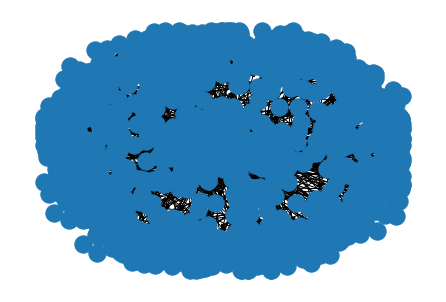

In [728]:
g__ = nx.Graph()
g__.add_edges_from(gateEdges)
print(len(gateEdges))
allDiffusionTime = []
mcaps=[tot_g[i] for i in random.sample(range(0, 500), 20)]
toTakeArgmax=[]
for node in gateNodesList:
#     print(node)
    bfs_tree = nx.bfs_tree(g__, source = node)
    nx.draw(bfs_tree)
    vecOfArgmax=[]
    for mcap in mcaps:
        model = ep.SIModel(bfs_tree)
        # Model Configuration
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', 0.03)
        cfg.add_model_parameter("fraction_infected", 0.07)
        model.set_initial_status(cfg)

        # Simulation execution
        iterations = model.iteration_bunch(200)

        #Mapping diffusion_time_to_each_node
        
        time_of_diffusion={}
        for i in range(1,node+1):
            time_of_diffusion[i]=-1
        for i in iterations:
            for j in i['status']:
                if(i['status'][j]==1):
                    time_of_diffusion[j]=i['iteration']
        allDiffusionTime.append(time_of_diffusion)
        
        for node in gateNodesList:
            if node not in time_of_diffusion.keys(): 
                time_of_diffusion[node]=-1
        
#         print("WWWW ",time_of_diffusion[17])
        
#         print("--->> ",sensor_nodes)
#         print("***** ")
#         for s in sensor_nodes:
#             print(time_of_diffusion[s])
#         print("***** ")
        
        min_v=min([time_of_diffusion[i] for i in sensor_nodes])
        min_n=-1
        for i in sensor_nodes:
            if(time_of_diffusion[i]==min_v):
                min_n=i
                break
        mu=[abs(time_of_diffusion[i]+min_v)/2 for i in sensor_nodes if(i!=min_n)]
#         print(len(delta_t),len(mu))
        
        arrivals=[]
        
        for sensor in sensor_nodes:
            if(time_of_diffusion[sensor]==-1):
                arrivals.append(200)
            else:
                arrivals.append(time_of_diffusion[sensor])
                
#         print("arrivals",arrivals)
                
        new_delta_ts = []
            
        for i in range(0,len(arrivals)):
            new_delta_t=[]
            for j in range(0,len(arrivals)):
                if(i!=j):
                    new_delta_t.append(abs(arrivals[j]-arrivals[i]))
            new_delta_ts.append(new_delta_t)
#             print("new_delta_ts",new_delta_ts)
#         print(new_delta_ts)
            
        lambd = []
        for i in range(0,len(new_delta_ts)-1):
#             print("---> ",len(new_delta_ts[i]),len(new_delta_ts[i+1]))
            val = np.correlate(new_delta_ts[i],new_delta_ts[i+1],"same")
            for i in range(0,len(val)):
                if (val[i]==0):
                    val[i]=1
            lambd.append(val)
#         print("lambd",lambd)
#         print("delta_t",delta_t,"mu",mu)    
        sub = np.subtract(delta_t,mu)
#         print("sub",sub)
        lambd[0][1]=0
        powerOfe = np.dot(np.dot((sub), np.linalg.inv(lambd) ),np.transpose(sub))
#         print("powerOfe",powerOfe)
        powerOfe=abs(powerOfe)
        fun = (1/np.linalg.det(lambd))*np.exp(-(1/2)*powerOfe)
        vecOfArgmax.append(fun)
    toTakeArgmax.append(vecOfArgmax)
print(toTakeArgmax)
#     print(node)
# nx.draw(nx.bfs_tree(g, source = 5))
#     print(time_of_diffusion)

In [729]:
print(allDiffusionTime)

[{1: 0, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1, 7: 0, 8: -1, 9: -1, 10: -1, 11: -1, 12: -1, 13: -1, 14: -1, 19: 21, 27: 47, 54: 57, 0: -1, 15: -1, 20: -1, 18: -1, 24: -1, 28: -1, 29: -1, 30: -1, 33: -1, 21: -1, 36: -1, 23: -1, 37: -1, 40: -1, 43: -1, 44: -1, 45: -1, 47: -1, 50: -1, 42: -1, 51: -1, 52: -1, 57: -1, 39: -1, 59: -1, 61: -1}, {1: -1, 2: 17, 3: -1, 4: -1, 5: -1, 6: -1, 7: -1, 8: -1, 9: -1, 10: 0, 11: -1, 12: -1, 13: -1, 14: -1, 15: -1, 16: -1, 17: -1, 18: 10, 19: -1, 20: -1, 21: -1, 22: -1, 23: 82, 24: 0, 25: -1, 26: -1, 27: -1, 28: -1, 29: 4, 30: -1, 31: -1, 32: -1, 33: -1, 34: -1, 35: -1, 36: -1, 37: -1, 38: -1, 39: -1, 40: -1, 41: -1, 42: -1, 43: -1, 44: -1, 45: 54, 46: -1, 47: -1, 48: -1, 49: -1, 50: -1, 51: 10, 52: -1, 53: -1, 54: -1, 55: -1, 56: -1, 57: -1, 58: -1, 59: -1, 60: -1, 61: -1, 0: -1}, {1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1, 7: -1, 8: -1, 9: -1, 10: -1, 11: -1, 12: -1, 13: -1, 14: -1, 15: -1, 16: -1, 17: -1, 18: -1, 19: -1, 20: -1, 21: 6, 22: -1, 23: -1, 24: -

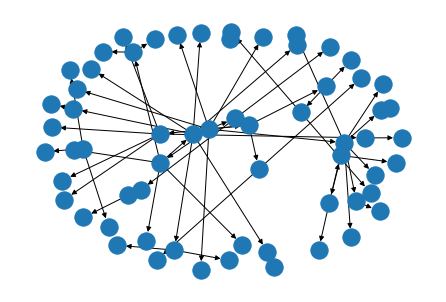

In [730]:
nx.draw(nx.bfs_tree(g, source = 1))

In [731]:
print(len(toTakeArgmax[0]),len(toTakeArgmax))

20 36


In [732]:
finArg = np.argmax(toTakeArgmax,axis=1)

In [733]:
id=-1
mx=-1
for i in range(0,len(finArg)):
    if(toTakeArgmax[i][finArg[i]]>mx):
        mx=toTakeArgmax[i][finArg[i]]
        id=i
clusterNode=gateNodesList[id]

In [734]:
print(clusterNode)

39


In [735]:
partition[clusterNode]
color=partition[clusterNode]
print(partition[clusterNode])

0


In [752]:
print(partition[36])

0


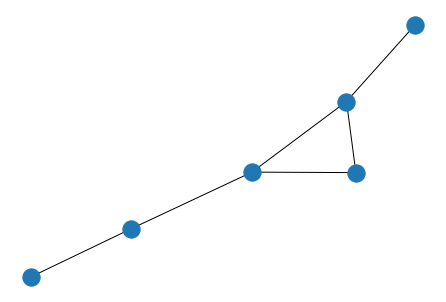

In [737]:
candidateCluster=[]
for e in G.edges():
    if(partition[e[0]]==color and partition[e[1]]==color):
        candidateCluster.append(e)
candidateGraph = nx.Graph()
candidateGraph.add_edges_from(candidateCluster)
nx.draw(candidateGraph)

In [738]:
myset=set([])
for e in candidateCluster:
    myset.add(e[0])
    myset.add(e[1])
print(myset)
my=[]
for ele in myset:
    my.append(ele)
print("list",my)


{3, 36, 39, 8, 59, 28}
list [3, 36, 39, 8, 59, 28]


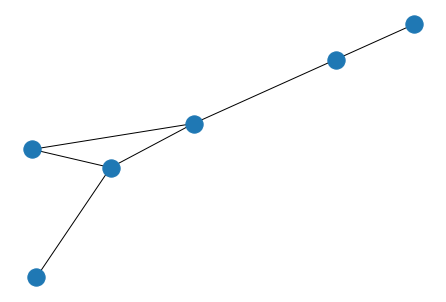

In [739]:
cG = G.subgraph(my)
nx.draw(cG)

500


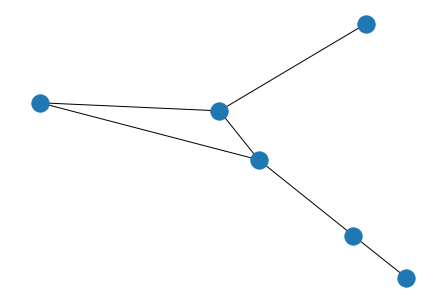

In [740]:
tot_cg_set=set([])
for i in range(0,500):
    tot_cg_set.add(tot_graphs[i].subgraph(my))
print(len(tot_cg_set))
tot_cg=[]
for g in tot_cg_set:
    tot_cg.append(g)
# print(len(tot_cg))
nx.draw(tot_graphs[7].subgraph(my))

In [741]:
print(len(cG.edges()))
nodes_in_cg=[]
nodes_in_cg_set=set([])
for ee in cG.edges():
    nodes_in_cg_set.add(ee[0])
    nodes_in_cg_set.add(ee[1])
for ele in nodes_in_cg_set:
    nodes_in_cg.append(ele)
print("nodes_in_cg",nodes_in_cg)
print(len(tot_cg[0]))
BCS_value_cg=BCS(tot_cg,len(tot_cg)+2,nodes_in_cg)
BCS_value_cg=(sorted(BCS_value_cg.items(), key=lambda x: x[1],reverse=True))

6
nodes_in_cg [3, 36, 39, 8, 59, 28]
6


In [742]:
# Model selection - diffusion time
model = ep.SIModel(cG)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.03)
cfg.add_model_parameter("fraction_infected", 1/max([max(x[0],x[1]) for x in cG.edges()]))
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)

#Mapping diffusion_time_to_each_node
time_of_diffusion_cg={}
for i in range(1,node+1):
    time_of_diffusion_cg[i]=-1
for i in iterations:
    for j in i['status']:
        if(i['status'][j]==1):
            time_of_diffusion_cg[j]=i['iteration']

100%|██████████| 200/200 [00:00<00:00, 6668.16it/s]


In [743]:
print(time_of_diffusion_cg)

{1: -1, 2: -1, 3: 34, 4: -1, 5: -1, 6: -1, 7: -1, 8: 35, 9: -1, 10: -1, 11: -1, 12: -1, 13: -1, 14: -1, 15: -1, 16: -1, 17: -1, 18: -1, 19: -1, 20: -1, 21: -1, 22: -1, 23: -1, 24: -1, 25: -1, 26: -1, 27: -1, 28: 65, 29: -1, 30: -1, 31: -1, 32: -1, 33: -1, 34: -1, 35: -1, 36: 0, 37: -1, 38: -1, 39: 50, 40: -1, 41: -1, 42: -1, 43: -1, 44: -1, 45: -1, 46: -1, 47: -1, 48: -1, 49: -1, 50: -1, 51: -1, 52: -1, 53: -1, 54: -1, 55: -1, 56: -1, 57: -1, 58: -1, 59: 13, 60: -1, 61: -1}


In [744]:
sensor_nodes_cg=[BCS_value_cg[i][0] for i in range(0,3)]
print(sensor_nodes_cg)

[59, 36, 8]


In [745]:
delta_t_cg=[]
min_v_cg=min([time_of_diffusion_cg[i] for i in sensor_nodes_cg])
min_n_cg=-1
for i in sensor_nodes_cg:
    if(time_of_diffusion_cg[i]==min_v_cg):
        min_n_cg=i
        break
delta_t_cg=[abs(time_of_diffusion_cg[i]-min_v_cg) for i in sensor_nodes_cg if(i!=min_n_cg)]
print(delta_t_cg)

[13, 35]


100%|██████████| 200/200 [00:00<00:00, 7690.19it/s]


[[1.0941504873718084e-227, 1.3191000232570124e-07, 4.714556603173575e-09, 4.377491037053051e-223, 1.0941504873718084e-227, 6.169256564919918e-10, 1.0941504873718084e-227, 6.3976429837105696e-09, 1.0941504873718084e-227, 1.0941504873718084e-227, 6.169256564919918e-10, 2.1598694274673952e-07, 6.169256564919918e-10, 4.377491037053051e-223, 4.377491037053051e-223, 6.169256564919918e-10, 3.119539217843205e-09, 7.878518162332897e-09, 8.021124449714633e-09, 4.377491037053051e-223], [9.723699195380178e-07, 4.377491037053051e-223, 1.281209260815677e-07, 3.932837416537478e-08, 1.0941504873718084e-227, 4.377491037053051e-223, 4.377491037053051e-223, 4.377491037053051e-223, 1.4105879046447137e-06, 4.377491037053051e-223, 4.377491037053051e-223, 4.377491037053051e-223, 4.519407985010054e-07, 4.377491037053051e-223, 6.890998596820366e-10, 1.0941504873718084e-227, 1.0941504873718084e-227, 4.377491037053051e-223, 1.0941504873718084e-227, 4.377491037053051e-223], [1.0941504873718084e-227, 1.04010556966

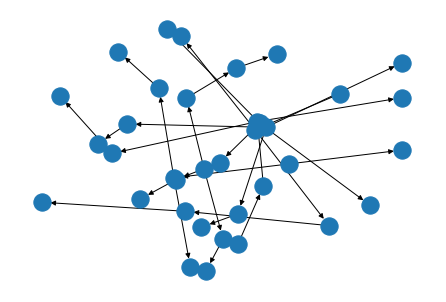

In [746]:
g___cg = nx.Graph()
g___cg.add_edges_from(cG.edges())
# allDiffusionTime = []
mcaps_cg=[tot_cg[i] for i in random.sample(range(0, 500), 20)]
toTakeArgmax_cg=[]
for node in nodes_in_cg:
#     print(node)
    bfs_tree = nx.bfs_tree(g___cg, source = node)
    nx.draw(bfs_tree)
    vecOfArgmax_cg=[]
    for mcap_cg in mcaps_cg:
        model = ep.SIModel(bfs_tree)
        # Model Configuration
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', 0.03)
        cfg.add_model_parameter("fraction_infected", 1/max([max(x[0],x[1]) for x in bfs_tree.edges()]))
        model.set_initial_status(cfg)

        # Simulation execution
        iterations = model.iteration_bunch(200)

        #Mapping diffusion_time_to_each_node
        
        time_of_diffusion_cg={}
        for i in range(1,node+1):
            time_of_diffusion_cg[i]=-1
        for i in iterations:
            for j in i['status']:
                if(i['status'][j]==1):
                    time_of_diffusion_cg[j]=i['iteration']
        
        for node in nodes_in_cg:
            if node not in time_of_diffusion_cg.keys(): 
                time_of_diffusion_cg[node]=-1
        
        min_v_cg=min([time_of_diffusion_cg[i] for i in sensor_nodes_cg])
        min_n_cg=-1
        for i in sensor_nodes_cg:
            if(time_of_diffusion_cg[i]==min_v_cg):
                min_n_cg=i
                break
        mu_cg=[abs(time_of_diffusion_cg[i]+min_v_cg)/2 for i in sensor_nodes_cg if(i!=min_n_cg)]
#         print(len(delta_t_cg),len(mu_cg))
        
        arrivals_cg=[]
        
        for sensor in sensor_nodes_cg:
            if(time_of_diffusion_cg[sensor]==-1):
                arrivals_cg.append(200)
            else:
                arrivals_cg.append(time_of_diffusion_cg[sensor])
                
#         print("arrivals_cg",arrivals_cg)
                
        new_delta_ts_cg = []
            
        for i in range(0,len(arrivals_cg)):
            new_delta_t_cg=[]
            for j in range(0,len(arrivals_cg)):
                if(i!=j):
                    new_delta_t_cg.append(abs(arrivals_cg[j]-arrivals_cg[i]))
            new_delta_ts_cg.append(new_delta_t_cg)
#             print("new_delta_ts_cg",new_delta_ts_cg)
#         print(new_delta_ts_cg)
            
        lambd_cg = []
        for i in range(0,len(new_delta_ts_cg)-1):
#             print("---> ",len(new_delta_ts_cg[i]),len(new_delta_ts_cg[i+1]))
            val_cg = np.correlate(new_delta_ts_cg[i],new_delta_ts_cg[i+1],"same")
            for i in range(0,len(val_cg)):
                if (val_cg[i]==0):
                    val_cg[i]=1
            lambd_cg.append(val_cg)
#         print("lambd_cg",lambd_cg)
#         print("delta_t_cg",delta_t_cg,"mu_cg",mu_cg)    
        sub_cg = np.subtract(delta_t,mu_cg)
#         print("sub_cg",sub_cg)
        lambd_cg[0][1]=0
        powerOfe_cg = np.dot(np.dot((sub_cg), np.linalg.inv(lambd_cg) ),np.transpose(sub_cg))
#         print("powerOfe_cg",powerOfe_cg)
        powerOfe_cg=abs(powerOfe_cg)
        fun_cg = (1/np.linalg.det(lambd_cg))*np.exp(-(1/2)*powerOfe_cg)
        vecOfArgmax_cg.append(fun_cg)
    toTakeArgmax_cg.append(vecOfArgmax_cg)
print(toTakeArgmax_cg)
#     print(node)
# nx.draw(nx.bfs_tree(g, source = 5))
#     print(time_of_diffusion)

In [747]:
print(len(toTakeArgmax_cg[0]),len(toTakeArgmax_cg))

20 6


In [748]:
finArg_cg = np.argmax(toTakeArgmax_cg,axis=1)

In [749]:
id_cg=-1
mx_cg=-1
for i in range(0,len(finArg_cg)):
    if(toTakeArgmax_cg[i][finArg_cg[i]]>mx):
        mx_cg=toTakeArgmax_cg[i][finArg_cg[i]]
        id_cg=i
source_node=nodes_in_cg[id_cg]
print(source_node)

28


In [751]:
print(partition[source_node])
print(partition[36])

0
0
